# Interest Rate Prediciton and Analysis

## Group 11
## Rishabh Singh (002743830)
## Shubham Singh (002762502)

In [1]:
import numpy as np                #importing numpy package
import matplotlib.pyplot as plt   #importing matplotlib package
import featuretools as ft         #importing featuretools package
import seaborn as sns             #importing seaborn package
import pandas as pd               #importing pandas package
    import warnings                   #importing warnings package to filter out the warnings coming while execution
    warnings.filterwarnings("ignore")

# Reading dataset

In [2]:
data = pd.read_csv('C:/Users/risha/DataScience/DS_Project_Group11/accepted_2007_to_2018q4.csv', header=0,encoding='utf-8',low_memory=False,)

In [3]:
# Using pandas function to view dataset and understand the features and values of the data

In [4]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,...,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,...,0.0,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,...,3.0,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,...,3.0,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,...,3.0,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [6]:
data.shape

(2260701, 151)

In [7]:
data.isnull().sum().sort_values().sum()

108486249

Text(0, 0.5, '%\xa0missing\xa0data')

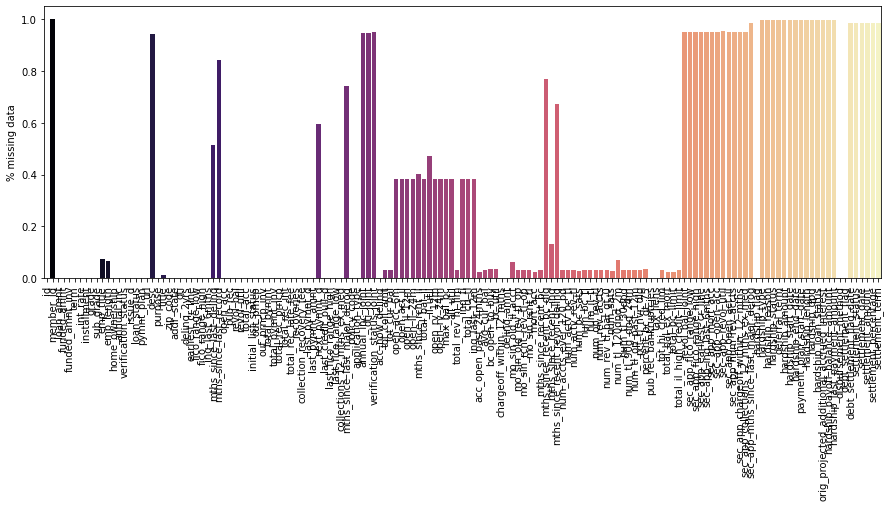

In [8]:
null_perc = data.isnull().sum()/data.isnull().count()

plt.figure(figsize=(15,5))

sns.barplot(x = np.arange(len(null_perc)), y =null_perc, palette="magma")

plt.xticks(np.arange(len(null_perc)),null_perc.index,rotation=90)
plt.ylabel('% missing data')

In [9]:
df = data.copy()

In [10]:
Columns_needed = ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'dti','delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m',
       'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m','total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'next_pymnt_d', 
       'collections_12_mths_ex_med','mths_since_last_major_derog', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',]

In [11]:
df = df[Columns_needed] #Keeping cloumns which have impact on determining interest rate for the loan and could play part in the prediction and analysis in future

In [12]:
df.shape # Number of columns after left after keeping the columns needed is 65

(2260701, 65)

## Distribution Graph of Loan Amount

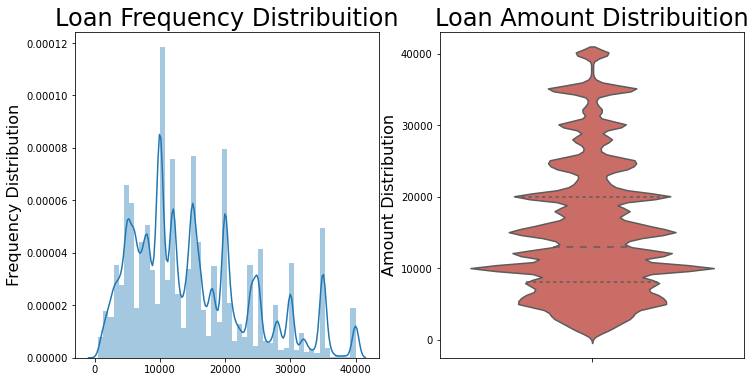

In [13]:
plt.figure(figsize=(12,6))

plt.subplot(121)
g = sns.distplot(df["loan_amnt"])
g.set_xlabel("", fontsize=12)
g.set_ylabel("Frequency Distribution", fontsize=16)
g.set_title("Loan Frequency Distribuition", fontsize=24)

plt.subplot(122)
g1 = sns.violinplot(y="loan_amnt", data=df, 
               inner="quartile", palette="hls")
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Amount Distribution", fontsize=16)
g1.set_title("Loan Amount Distribuition", fontsize=24)

plt.show()

## Distribution Graph for loan status

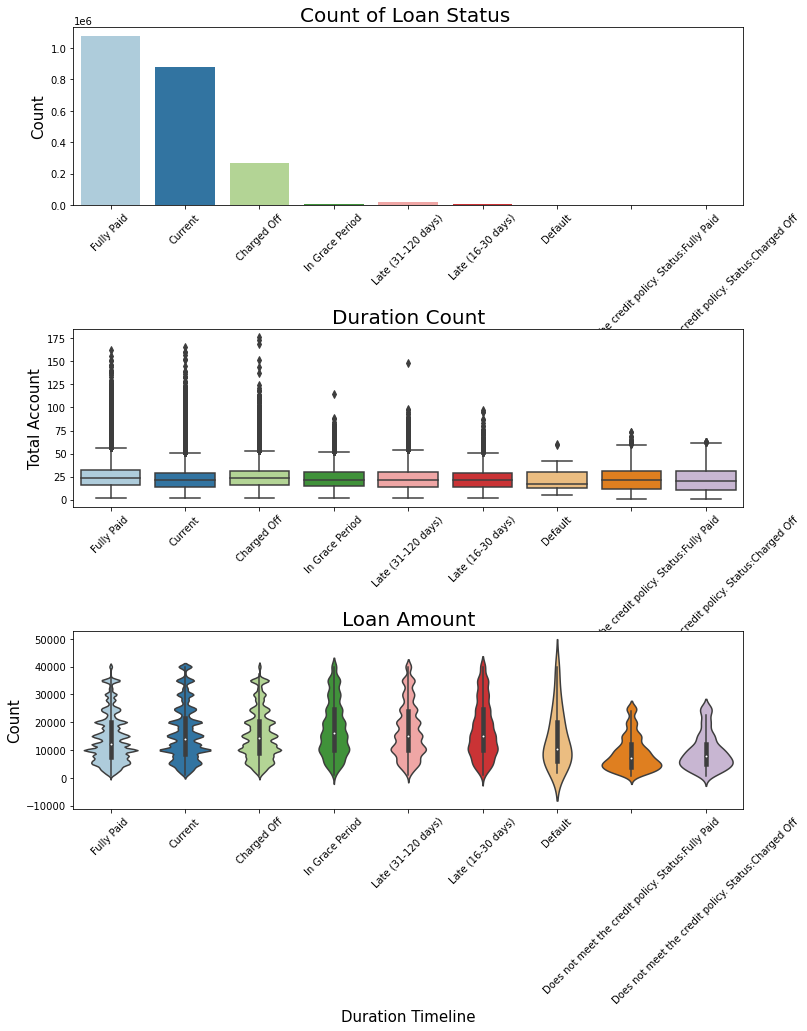

In [14]:
#print(df.loan_status.value_counts())
plt.figure(figsize = (12,14))

#Count Graph for plotting the count of each value of loan statu vs Loan status value
plt.subplot(311)
graph = sns.countplot(x="loan_status",palette="Paired",data=df)
graph.set_xticklabels(graph.get_xticklabels(),rotation=45)
graph.set_xlabel("", fontsize=12)
graph.set_ylabel("Count", fontsize=15)
graph.set_title("Count of Loan Status ", fontsize=20)

#Box Graph for plotting the loan status value vs Total accounts
plt.subplot(312)
graph1 = sns.boxplot(x="loan_status", y="total_acc", palette="Paired", data=df)
graph1.set_xticklabels(graph1.get_xticklabels(),rotation=45)
graph1.set_xlabel("", fontsize=12)
graph1.set_ylabel("Total Account", fontsize=15)
graph1.set_title("Duration Count", fontsize=20)

#Violin Graph for plotting the the displaying distribution of count vs loan status
plt.subplot(313)
graph2 = sns.violinplot(x="loan_status", y="loan_amnt",palette="Paired", data=df)
graph2.set_xticklabels(graph2.get_xticklabels(),rotation=45)
graph2.set_xlabel("Duration Timeline", fontsize=15)
graph2.set_ylabel("Count", fontsize=15)
graph2.set_title("Loan Amount", fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.7,top = 0.9)

plt.show()

# Removing columns with nulls more than 50%

In [15]:
df.isna().sum()
columns_with_more_null = []
columns_with_data = []

for key,value in (df.isna().sum()/len(df)*100).sort_values().items():
    if value > 50:
        columns_with_more_null.append(key)
    else:
        columns_with_data.append(key)


In [16]:
print(len(columns_with_more_null))

9


In [17]:
df=df.drop(columns=columns_with_more_null)

In [18]:
df.shape #n_sample,n_feature count after dropping columns which have null values more than 50%

(2260701, 56)

# Splitting data into Numeric and Categorical Values

In [19]:
numeric_columns=df.select_dtypes(include=['int64','float'])
categorical_columns = df.select_dtypes(include=['object'])

In [20]:
numeric_columns.shape[1] # Count of numeric columns 

43

In [21]:
categorical_columns.shape[1] #Count of Categorical Columns

13

# Getting dummy values for categorical Columns

In [22]:
df = pd.get_dummies(df,columns=['grade', 'sub_grade','home_ownership',
       'verification_status','loan_status', 'pymnt_plan','initial_list_status', 'application_type'],drop_first=True)
#generating dummy values for the above mentioned columns to convert the categorical data into numeric data

In [23]:
df.shape

(2260701, 106)

## Bar Plot for Missing Values

In [24]:
data_missing = df.isna().sum()

# create figure
figure = plt.figure()
axes = figure.add_axes([15,15,20,20])
# set Y axis label
axes.set_ylabel('count')
# set orientation for X axis labels
plt.xticks(rotation='vertical')
# draw bar chart
axes.bar(df.columns, data_missing)
plt.show()

# Createing dataset with required cloumns

In [25]:
df.to_csv("preprocesing_data.csv")

# Importing dataset for remvoing missing values and getting numerical data accross all columns

In [26]:
data1 = pd.read_csv("preprocesing_data.csv",header=0, encoding='utf-8', low_memory=False)
df2 = data1.copy()

In [27]:
df2.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
df2.shape

(2260701, 106)

# Binary equivalent value for term column

In [28]:
df2['term'] = [0 if x == " 36 months" else 1 for x in df2['term']] #Assigning binary equivalent values to term column having values as 36 months and 64 months to 0 and 1 respectively

# Replacing strings in emp_length column with numeric value

In [29]:
df2['emp_length'].fillna(0)                           #replacing null values with 0
df2['emp_length'].replace(np.nan,0,inplace=True)      #replacing np.nan values with 0
df2['emp_length'].replace('< 1 year',0,inplace=True)  #replacing <1 year value with 0
df2['emp_length'].replace('1 year',1,inplace=True)    #replacing 1 year values with 1
df2['emp_length'].replace('2 years',2,inplace=True)   #replacing 2 years values with 2
df2['emp_length'].replace('3 years',3,inplace=True)   #replacing 3 years values with 3
df2['emp_length'].replace('4 years',4,inplace=True)   #replacing 4 years values with 4
df2['emp_length'].replace('5 years',5,inplace=True)   #replacing 5 years values with 5
df2['emp_length'].replace('6 years',6,inplace=True)   #replacing 6 years values with 6
df2['emp_length'].replace('7 years',7,inplace=True)   #replacing 7 years values with 7
df2['emp_length'].replace('8 years',8,inplace=True)   #replacing 8 years values with 8
df2['emp_length'].replace('9 years',9,inplace=True)   #replacing 9 years values with 9
df2['emp_length'].replace('10+ years',11,inplace=True)#replacing 10+ years values with 11

In [30]:
df2['issue_month'] = [pd.to_datetime(x).month for x in df2['issue_d']] #extracting month from issue date and storing in issue_month cloumn in dataframe

In [31]:
df2['issue_year'] = [pd.to_datetime(x).year for x in df2['issue_d']] #extracting year from issue date and storing in issue_year cloumn in dataframe

In [32]:
df2.drop(['id','url','issue_d'],axis = 1,inplace= True) # Removing columns issues date as it has been seperated into issue month and issue year. removing id as it just a primary key and url cause it doesnot have any meaningful data

In [33]:
df2.to_csv('numerica_data.csv')

# Handle missing values using simple imputer

In [34]:
from sklearn.impute import SimpleImputer

In [35]:
simpleimpute = SimpleImputer() # using simple imputer to handle missing values with the strategy of mean

In [36]:
simpleimpute= simpleimpute.fit(df2)

In [37]:
data=simpleimpute.transform(df2)
dataframe = pd.DataFrame(data,columns=df2.columns)
dataframe.isnull().sum().sort_values().sum()

0

In [38]:
numerical_data = dataframe.select_dtypes(include = ['int64','float','uint8'])
categorical_data = dataframe.select_dtypes(include = ['object'])
categorical_features = categorical_data.columns.values
numerical_features = numerical_data.columns.values
print(categorical_columns.shape[1])

13


## exporting data after handling missing values

In [39]:
dataframe.to_csv('data_without_missingval.csv')

## Normalizing the Data

In [40]:
dfNor = pd.read_csv('data_without_missingval.csv', header=0,encoding='utf-8', low_memory=False)

In [41]:
dfNor.drop(['Unnamed: 0'], axis=1, inplace = True)
dfNor.shape
df_random = dfNor.copy()

In [42]:
#After handling missing values we split data into two groups.
#B contains all the columns which are accquired via dummy values or by changing categorical value to numerical value
#A contains all the cloumns having values and needed to be normaziled

A = dfNor[['loan_amnt','funded_amnt','funded_amnt_inv','term','installment','emp_length','annual_inc','dti',
             'delinq_2yrs','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv',
             'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
             'last_pymnt_amnt','collections_12_mths_ex_med','acc_now_delinq','tot_coll_amt','tot_cur_bal','open_acc_6m','open_act_il',
             'open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util',
             'total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','issue_month','issue_year']].values




B = dfNor[['int_rate','grade_B','grade_C','grade_D','grade_E','grade_F','grade_G','sub_grade_A2','sub_grade_A3',
             'sub_grade_A4','sub_grade_A5','sub_grade_B1','sub_grade_B2','sub_grade_B3','sub_grade_B4',
             'sub_grade_B5','sub_grade_C1','sub_grade_C2','sub_grade_C3','sub_grade_C4','sub_grade_C5',
             'sub_grade_D1','sub_grade_D2','sub_grade_D3','sub_grade_D4','sub_grade_D5','sub_grade_E1',
             'sub_grade_E2','sub_grade_E3','sub_grade_E4','sub_grade_E5','sub_grade_F1','sub_grade_F2',
             'sub_grade_F3','sub_grade_F4','sub_grade_F5','sub_grade_G1','sub_grade_G2','sub_grade_G3',
             'sub_grade_G4','sub_grade_G5','home_ownership_MORTGAGE','home_ownership_NONE','home_ownership_OTHER',
             'home_ownership_OWN','home_ownership_RENT','verification_status_Source Verified','verification_status_Verified',
             'loan_status_Current','loan_status_Default','loan_status_Does not meet the credit policy. Status:Charged Off',
             'loan_status_Does not meet the credit policy. Status:Fully Paid','loan_status_Fully Paid','loan_status_In Grace Period',
             'loan_status_Late (16-30 days)','loan_status_Late (31-120 days)','pymnt_plan_y','initial_list_status_w','application_type_Joint App']]


## Normalize the data using Standard Scaler

In [43]:
from sklearn.preprocessing import StandardScaler # importing Standard Scaler package to normalize the 
ssnormalize = StandardScaler().fit(A)

In [44]:
normaziled_data = ssnormalize.transform(A)

In [45]:
np.set_printoptions(precision=4)
print(normaziled_data[0:5,:])

[[-1.2456 -1.2452 -1.2427 -0.6359 -1.2081  1.1994 -0.204  -0.9109 -0.3539
   0.4776 -0.8177 -0.3462 -0.6054 -0.8354 -0.9312 -0.5729 -0.5728 -0.7737
  -0.7722 -0.7097 -0.6007 -0.1282 -0.1923 -0.1828 -0.5494 -0.1203 -0.0596
   0.0584  0.0152  1.1894 -0.3307 -0.9304 -0.4539 -0.011  -0.8814 -1.922
   1.4448  0.1226 -1.1376 -1.4029 -0.6991  1.6987 -0.2274  1.049   1.5391
  -0.4785]
 [ 1.0504  1.0512  1.0527 -0.6359  1.4016  1.1994 -0.1153 -0.195   0.7992
   3.8638  1.8415 -0.3462  0.2097 -1.2605  1.1543 -0.5729 -0.5728  1.3733
   1.3757  1.8258 -0.5417 -0.1282 -0.1923 -0.1828 -0.4159 -0.1203 -0.0596
  -0.0278  0.3914  0.0732 -0.755  -0.9304 -0.4539 -0.1104 -0.5053  0.2238
   0.5998  0.1226  0.1489 -1.7075  2.1361 -0.8658 -0.7037  2.1175  1.5391
  -0.4785]
 [ 0.539   0.5396  0.5414  1.5726 -0.0492  1.1994 -0.133  -0.5674 -0.3539
  -0.6511 -0.995  -0.3462 -0.383   0.2373 -0.5141 -0.5729 -0.5728  1.0729
   1.0752  1.2611  0.1024 -0.1282 -0.1923 -0.1828  2.0577 -0.1203 -0.0596
  -0.0278  0.2984

In [46]:
df_afterNor = pd.DataFrame(normaziled_data,columns=['loan_amnt','funded_amnt','funded_amnt_inv','term','installment','emp_length','annual_inc','dti',
             'delinq_2yrs','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv',
             'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
             'last_pymnt_amnt','collections_12_mths_ex_med','acc_now_delinq','tot_coll_amt','tot_cur_bal','open_acc_6m','open_act_il',
             'open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util',
             'total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','issue_month','issue_year'])
df_afterNor

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,issue_month,issue_year
0,-1.245562e+00,-1.245237,-1.242723e+00,-0.635906,-1.208126e+00,1.199358,-2.040230e-01,-9.108711e-01,-3.538661e-01,0.477639,...,1.444792e+00,1.226092e-01,-1.137602e+00,-1.402920,-6.990860e-01,1.698658e+00,-2.273549e-01,1.048951e+00,1.539071,-4.784931e-01
1,1.050368e+00,1.051151,1.052686e+00,-0.635906,1.401621e+00,1.199358,-1.152882e-01,-1.949658e-01,7.992461e-01,3.863832,...,5.998187e-01,1.226092e-01,1.489256e-01,-1.707474,2.136099e+00,-8.658269e-01,-7.036861e-01,2.117491e+00,1.539071,-4.784931e-01
2,5.389525e-01,0.539633,5.413860e-01,1.572559,-4.920743e-02,1.199358,-1.330351e-01,-5.673776e-01,-3.538661e-01,-0.651092,...,-1.090128e+00,-3.676767e-01,-8.335341e-01,0.485321,-5.690824e-01,8.438294e-01,1.677970e+00,-5.538607e-01,1.539071,-4.784931e-01
3,2.171130e+00,2.172136,2.173193e+00,1.572559,1.437628e+00,1.199358,2.840188e-01,-1.244333e-01,-3.538661e-01,-0.651092,...,-2.451548e-01,-8.579626e-01,2.641537e-01,-0.732899,9.052141e-01,-8.658269e-01,-2.273549e-01,-1.088131e+00,1.539071,-4.784931e-01
4,-5.056411e-01,-0.505169,-5.029706e-01,1.572559,-5.835084e-01,-0.673435,2.346201e-01,4.616921e-01,7.992461e-01,2.735101,...,2.289766e+00,2.083753e+00,8.716185e-01,1.277163,-1.587546e-02,8.438294e-01,-2.273549e-01,5.146802e-01,1.539071,-4.784931e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,2.715189e+00,2.716304,2.717129e+00,1.572559,1.548642e+00,0.731160,1.322217e+00,-4.284285e-01,7.717920e+00,0.477639,...,-1.090128e+00,-1.348248e+00,-1.488776e-01,-0.367433,-5.884446e-01,1.698658e+00,-7.036861e-01,-1.959028e-02,0.952475,7.934939e-02
2260697,9.741999e-01,0.974967,9.765346e-01,1.572559,4.444829e-01,0.028862,2.840188e-01,-3.697291e-02,-3.538661e-01,-0.651092,...,-2.451548e-01,1.103181e+00,8.180238e-02,0.972608,-2.399243e-01,-8.658269e-01,-7.036861e-01,-5.538607e-01,0.952475,7.934939e-02
2260698,-1.139185e-01,-0.113368,-1.113369e-01,1.572559,-4.359627e-01,1.199358,1.509165e-01,3.199217e-01,-3.538661e-01,0.477639,...,-1.090128e+00,-8.579626e-01,-3.833613e-01,1.642629,-5.635503e-01,1.698658e+00,-2.273549e-01,-1.959028e-02,0.952475,7.934939e-02
2260699,-3.958552e-16,0.000000,-1.978827e-16,1.572559,-2.127600e-16,-1.375732,-1.291262e-16,-5.011638e-16,-6.401059e-17,0.000000,...,-5.628654e-16,6.531920e-16,1.627952e-15,0.000000,-4.025110e-16,1.898100e-15,1.269201e-15,-1.898110e-15,0.000000,2.536774e-13


## Saving the data after Normalization

In [47]:
data1 = pd.concat([df_afterNor,B],axis=1)
data1.shape

(2260701, 105)

In [48]:
data1.to_csv('Normalized_dataset.csv')

In [49]:
df3 = pd.read_csv("Normalized_dataset.csv",header=0,low_memory=False,encoding='utf-8')
df3.drop(['Unnamed: 0'], axis=1, inplace = True)

## Spliting data using Train_Test_split

In [50]:
from sklearn.model_selection import train_test_split                    #Spliting Data into Train and Test set with the slipt of 70-30
Train_df,Test_df = train_test_split(df3,test_size=0.3,random_state=42)
print(Train_df.shape)
print(Test_df.shape)                                                      

(1582490, 105)
(678211, 105)


## Splitting test data further into Cross Validation set and Test set

In [51]:
CV_df,Test_df = train_test_split(Test_df,test_size=0.5,random_state=42) #Splitting Test Dataset further into validation set and test set
print(CV_df.shape)
print(Test_df.shape)

(339105, 105)
(339106, 105)


## Correlation of Feature with Target Column

Text(0.5, 0, 'Correlation with int_rate')

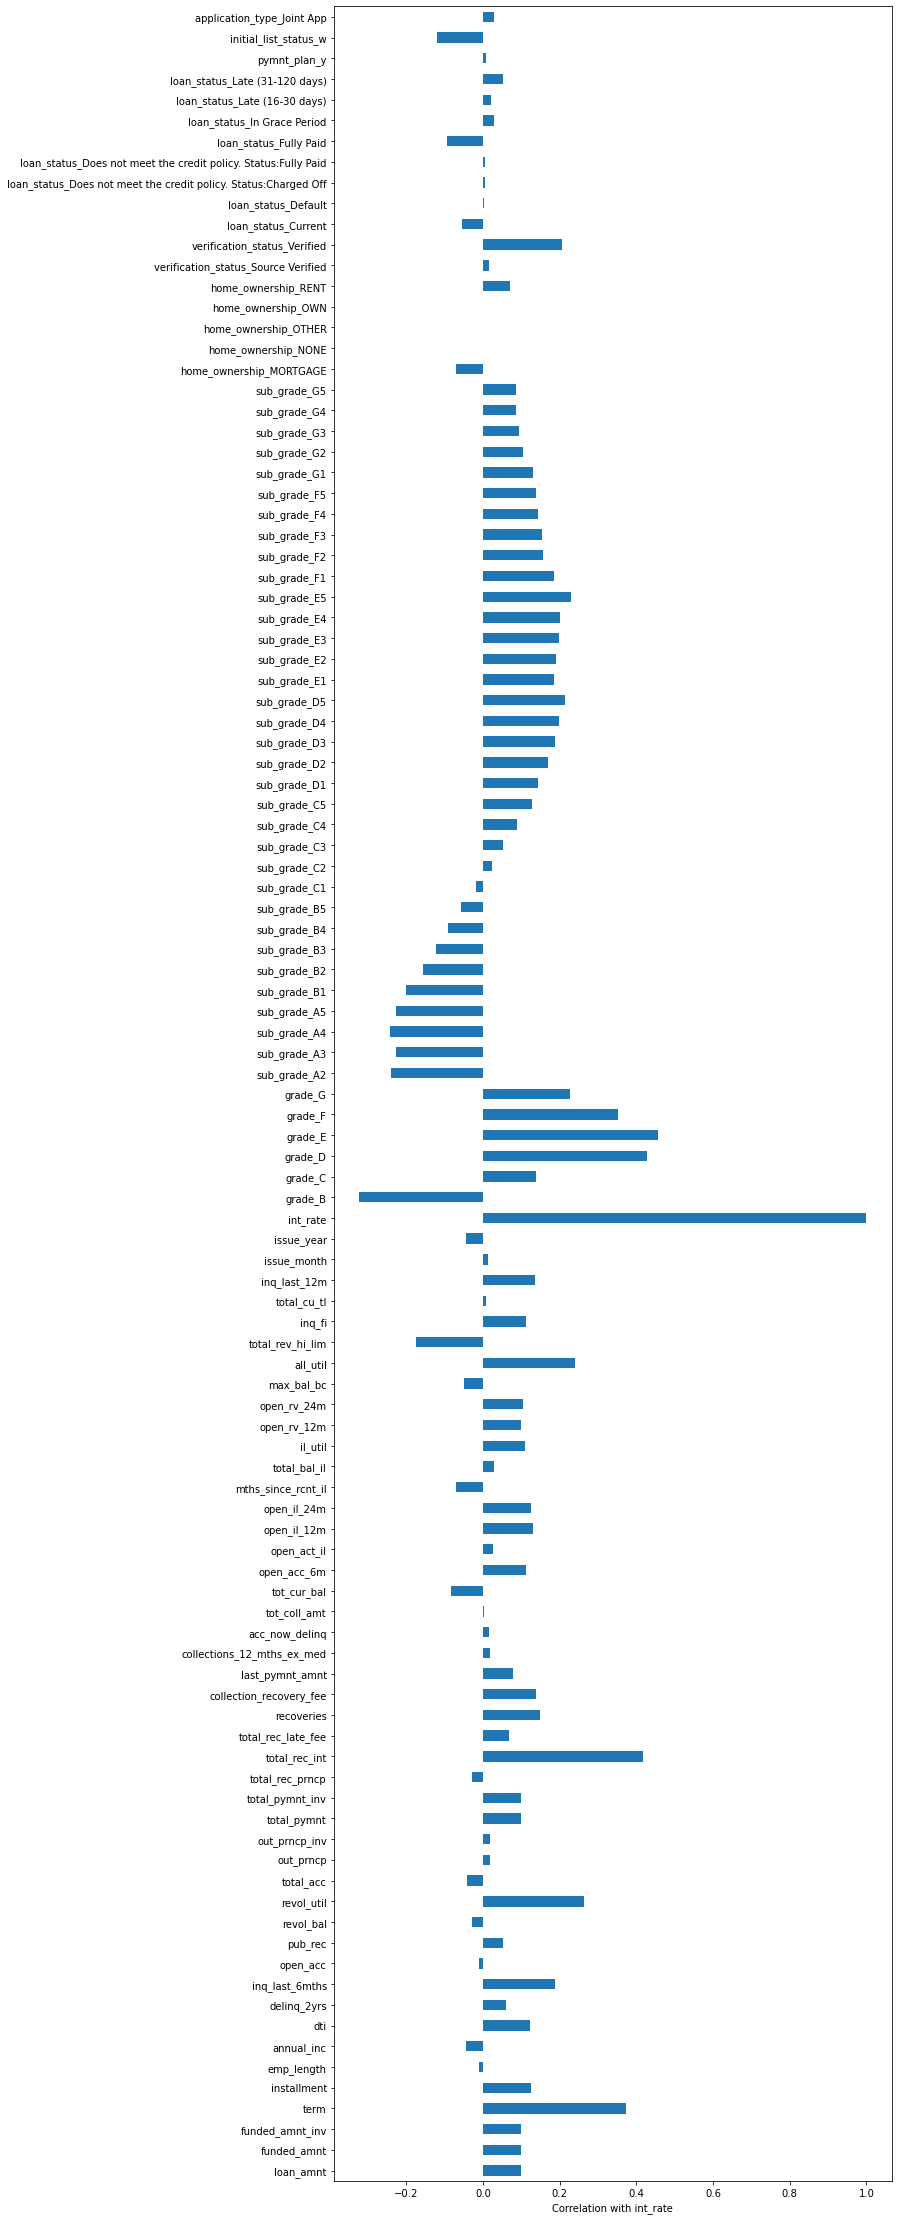

In [52]:
ax = Train_df.corr()['int_rate'].plot(kind="barh",figsize=(10,40))
ax.set_xlabel('Correlation with int_rate')

## Distribution of Interest rate

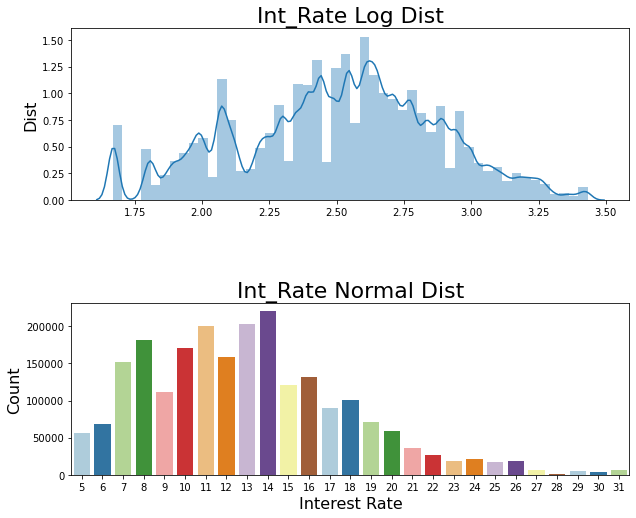

In [53]:
df3['int_round'] = df3['int_rate'].round(0).astype(int)
plt.figure(figsize = (10,8))

plt.subplot(211)
graph = sns.distplot(np.log(df3["int_rate"]))
graph.set_xlabel("", fontsize=12)
graph.set_ylabel("Dist", fontsize=16)
graph.set_title("Int_Rate Log Dist", fontsize=22)

plt.subplot(212)
graph1 = sns.countplot(x="int_round",data=df3, 
                   palette="Paired")
graph1.set_xlabel("Interest Rate", fontsize=16)
graph1.set_ylabel("Count", fontsize=16)
graph1.set_title("Int_Rate Normal Dist", fontsize=22)

plt.subplots_adjust(wspace = 0.2, hspace = 0.6,top = 0.9)

plt.show()

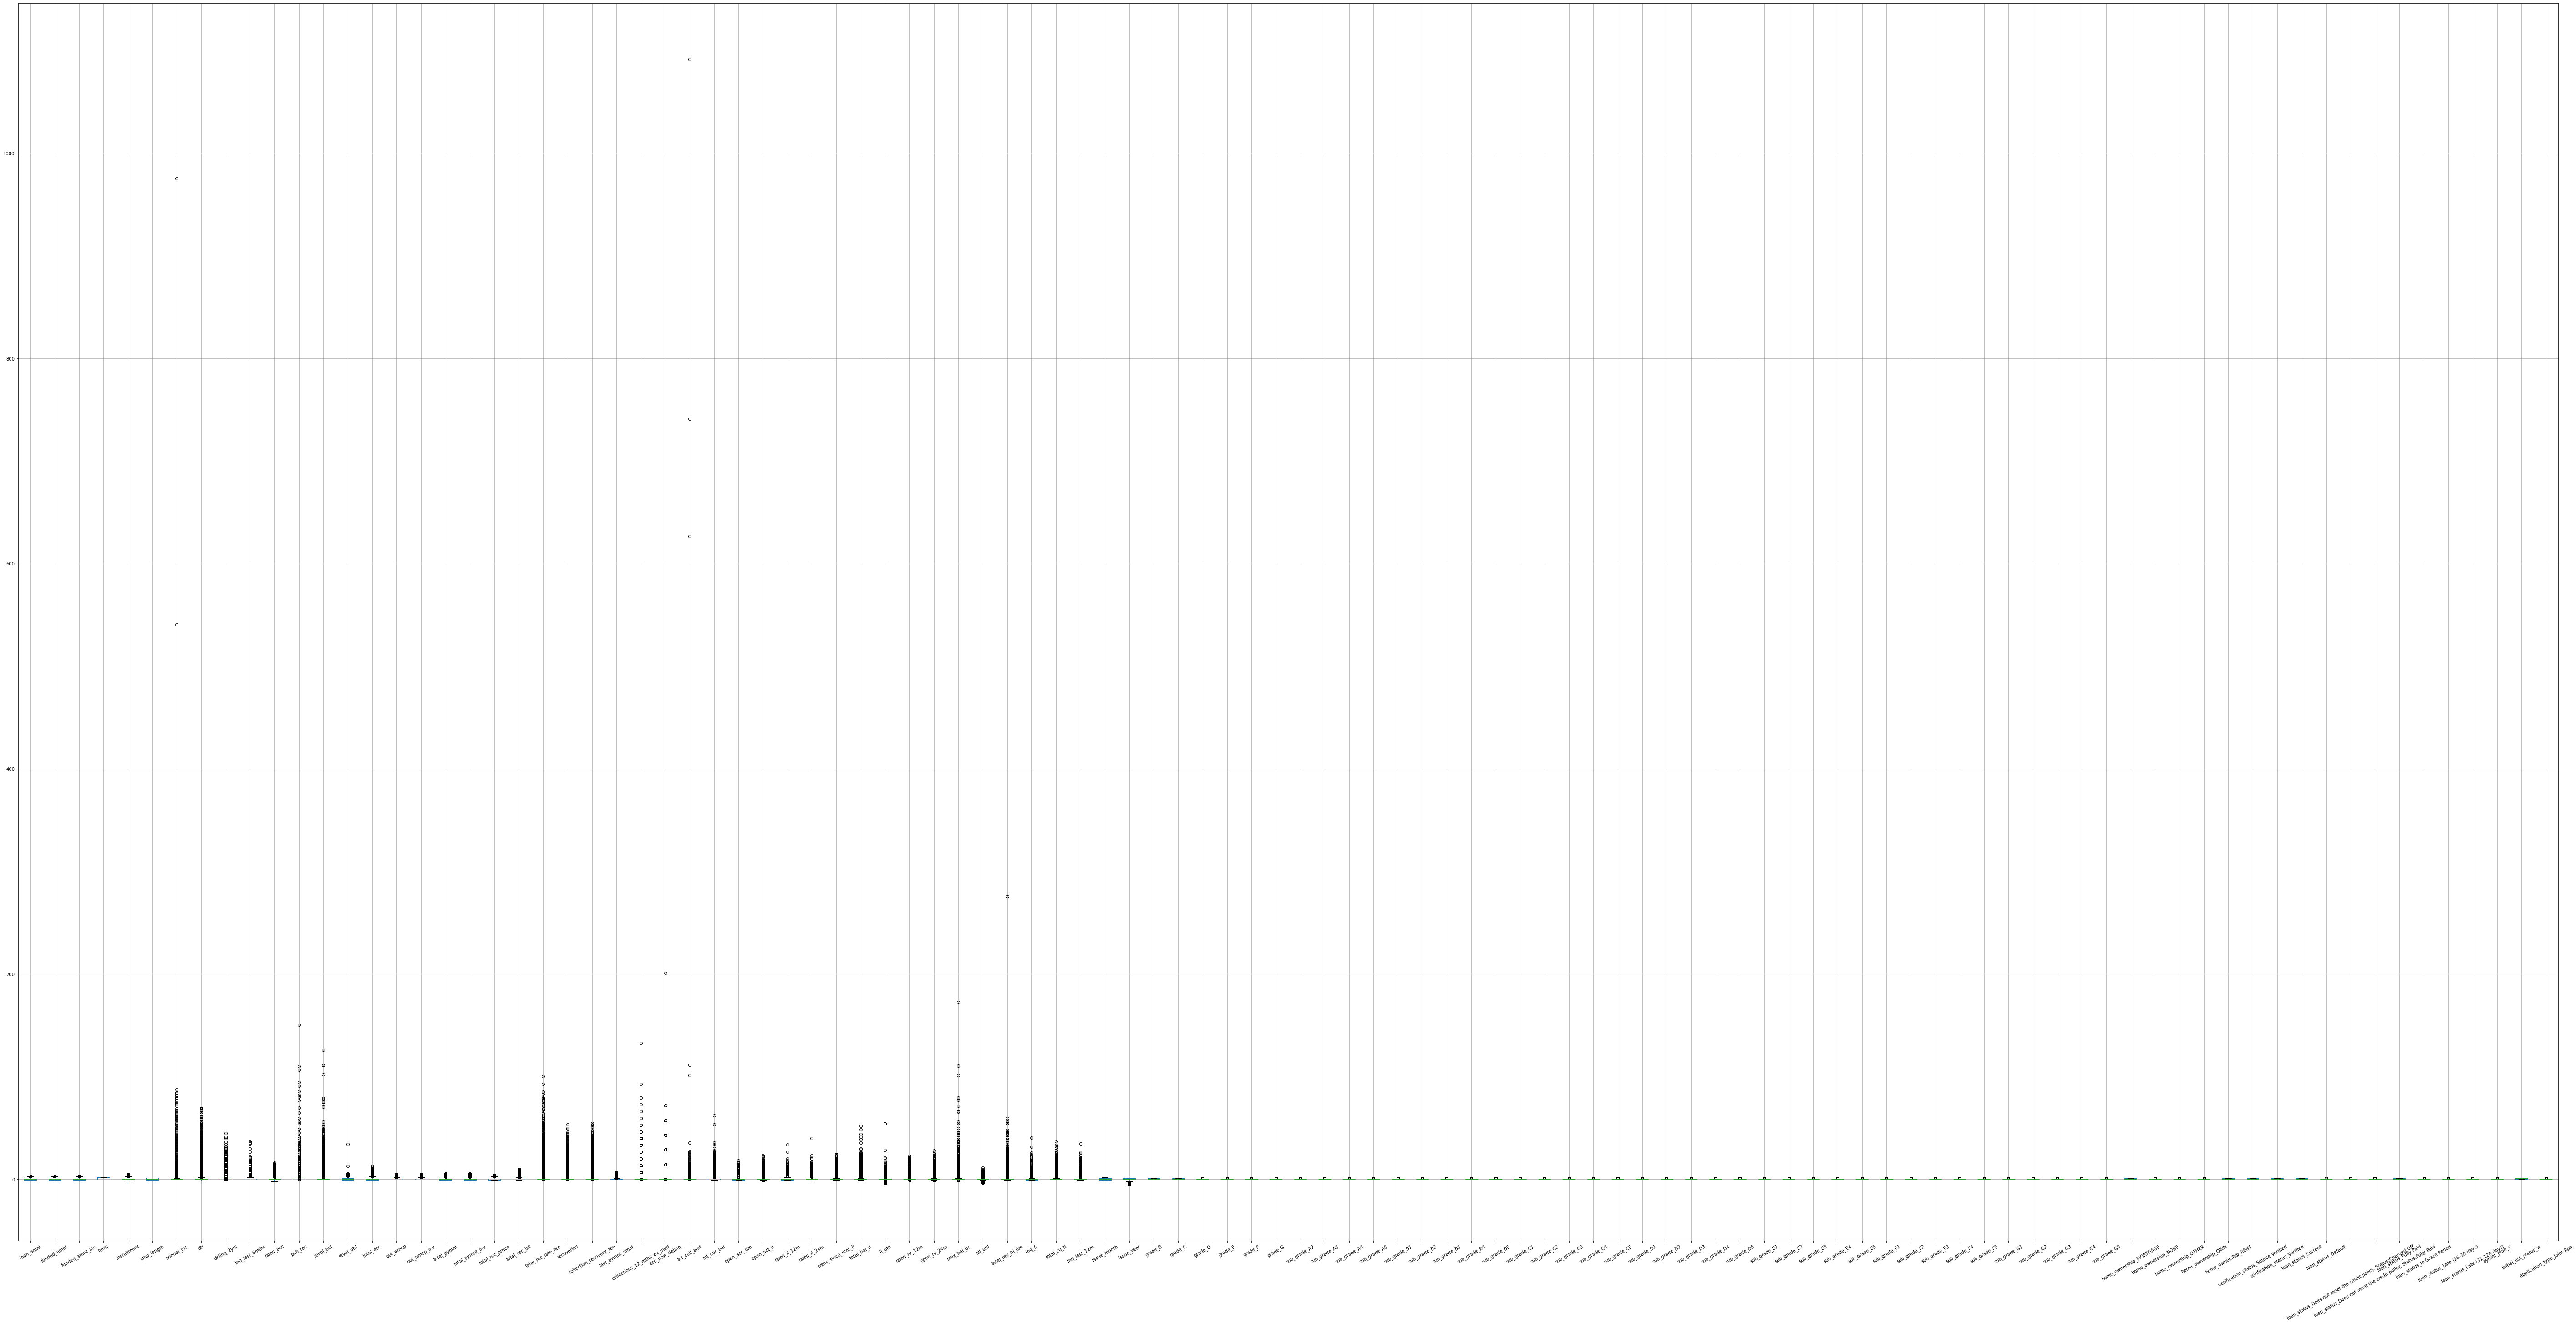

In [54]:
ax = Train_df.drop(['int_rate'], axis=1).boxplot(figsize=(100,50),rot=30)

## Classifying dependents and independent columns for Train,test

In [55]:
Train_x = Train_df.drop(["int_rate"],axis=1)
Train_y = np.array(Train_df["int_rate"])
CV_x = CV_df.drop(["int_rate"],axis=1)
CV_y = np.array(CV_df["int_rate"])
Test_x = Test_df.drop(["int_rate"],axis=1)
Test_y = np.array(Test_df["int_rate"])

## Using LasssoCV for feature selection

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score

In [57]:
lassomodel = LassoCV(alphas=[1, 0.1, 0.001, 0.0001, 10, 1000],cv=5).fit(CV_x,CV_y)
lassprediction = lassomodel.predict(CV_x)

In [58]:
coefficient = lassomodel.coef_
coefficient.shape

(104,)

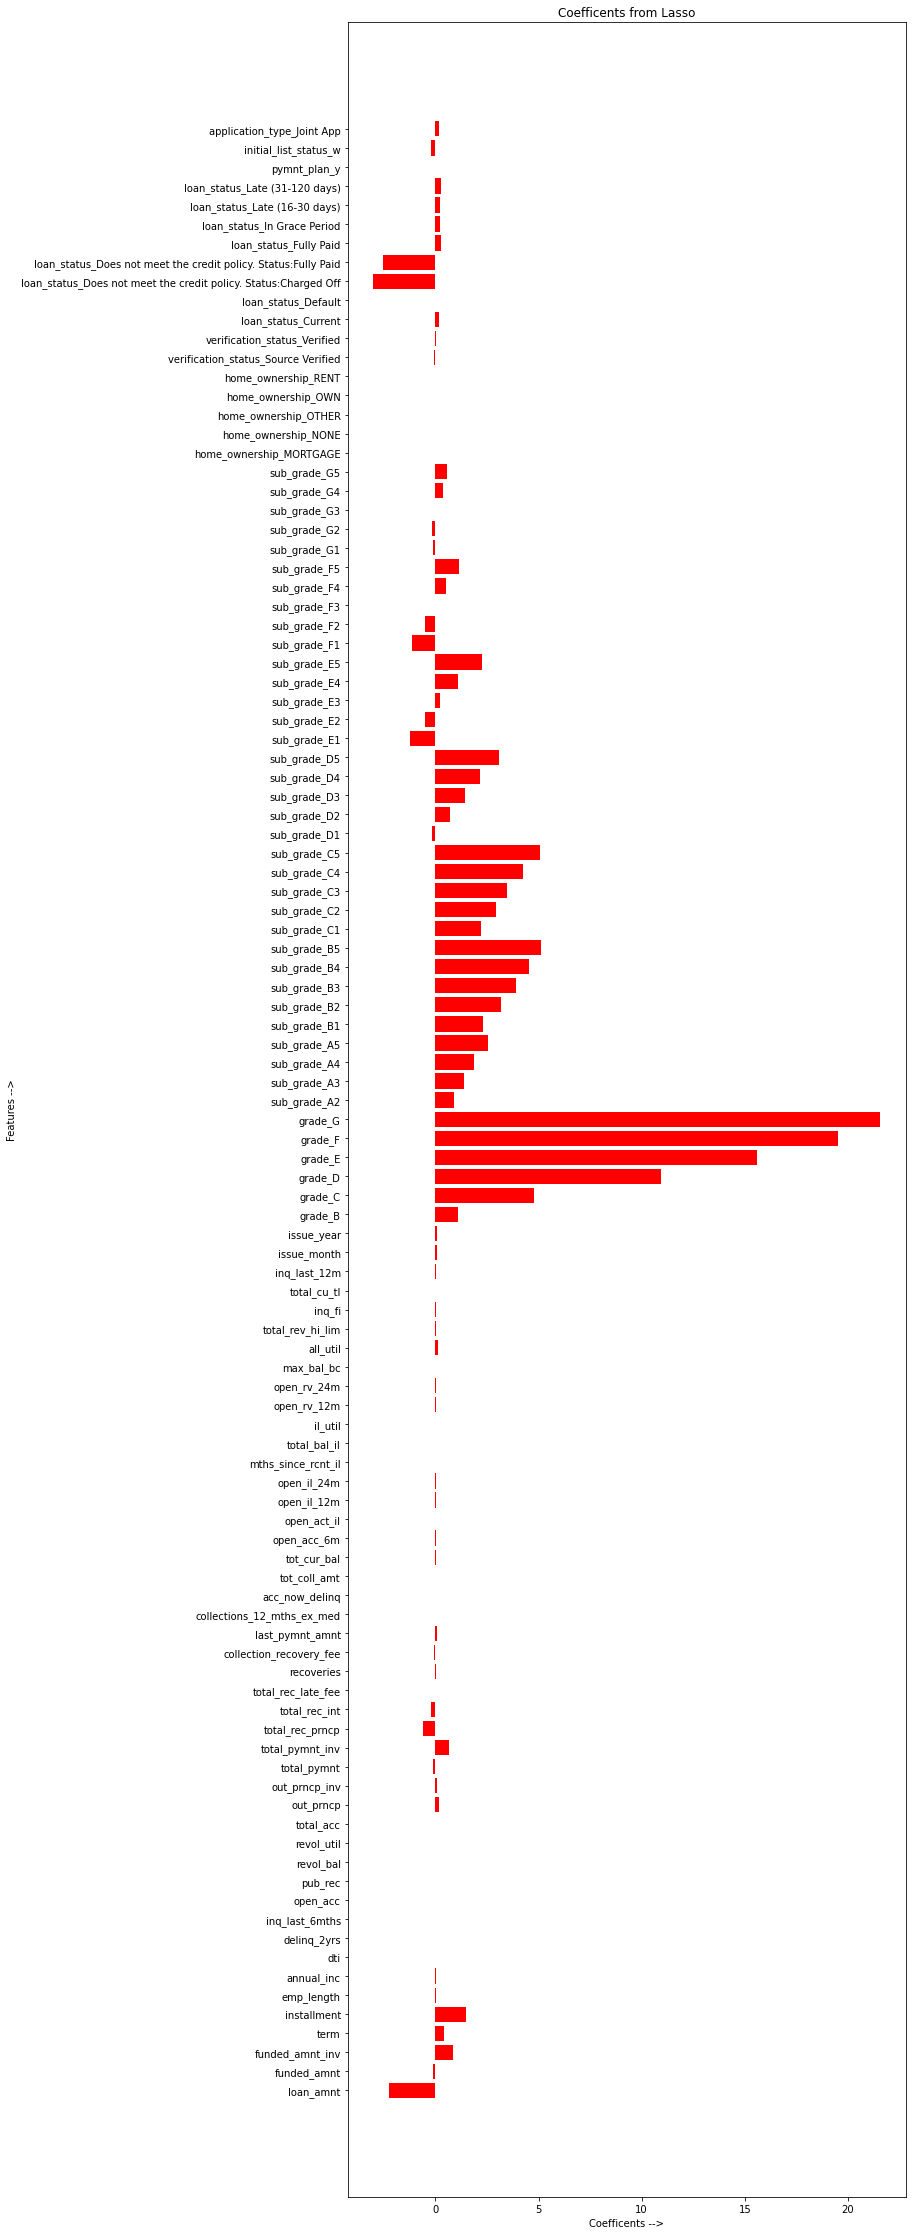

In [59]:
x = list(CV_x)
x_position = [a for a, _ in enumerate(x)]


plt.figure(figsize = (10,40))
plt.barh(x_position, coefficient, color='red')
plt.ylabel("Features -->")
plt.xlabel("Coefficents -->")
plt.title("Coefficents from Lasso")
plt.yticks(x_position, x)

plt.show()

## Using coefficient to select feature which will play part in prediction 

In [60]:
CV_x.columns.values[coefficient != 0 ]
CV_x.columns.values[coefficient == 0 ]

array(['sub_grade_F3', 'sub_grade_G3', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER',
       'loan_status_Default', 'pymnt_plan_y'], dtype=object)

## Dropping columns having coefficient zero

In [61]:
df3.drop(['sub_grade_F3', 'sub_grade_G3', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER',
       'loan_status_Default', 'pymnt_plan_y'],axis = 1 , inplace=True)

In [62]:
df3.shape[1]

99

## Storing the final dataset with all the required features and numeric data

In [63]:
df3.to_csv('dataset_final.csv')

<AxesSubplot:>

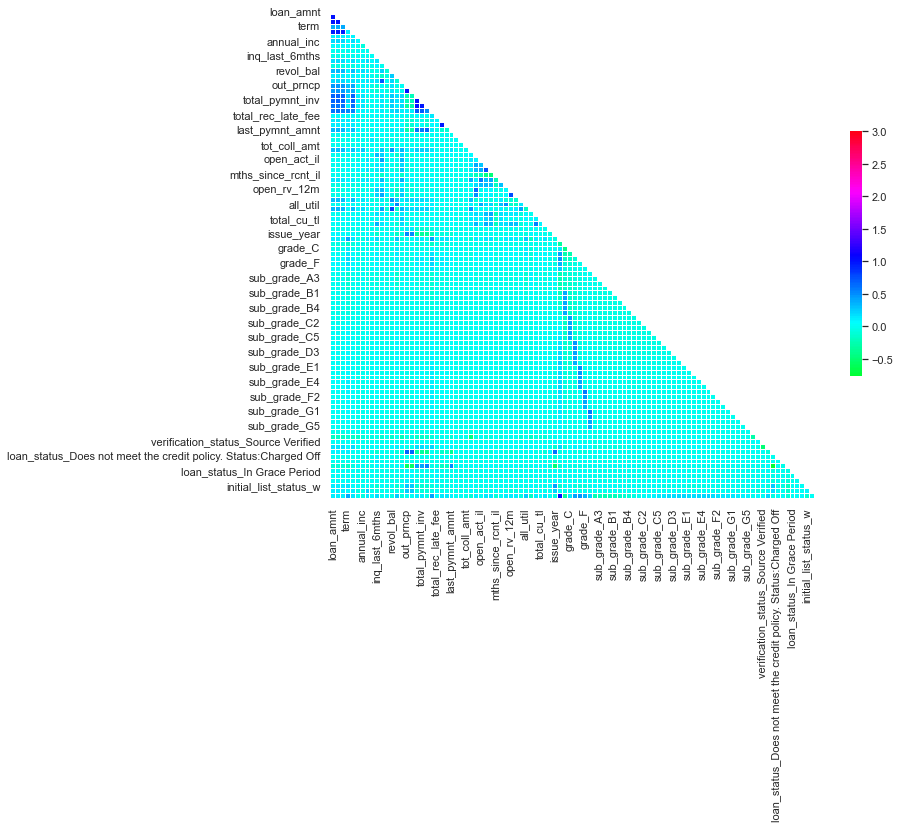

In [64]:
sns.set(style="white")
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df3.corr(),cmap='hsv',mask=np.triu(np.ones_like(df3.corr())),vmax=3,center=0,square=True, linewidths=.5,cbar_kws={"shrink": .5})

## Implementing Linear Regrresssion model and displaying its metrics

In [65]:
df4 = pd.read_csv("dataset_final.csv",header=0,encoding='utf-8',low_memory=False)
df4.drop(['Unnamed: 0'], axis=1, inplace = True)

In [66]:
df_linear = df4.copy()
df_svm = df4.copy()

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [68]:
X_linear = df_linear.drop(['int_rate'],axis=1).values

In [69]:
y_linear = df_linear[['int_rate']].values

In [70]:
X_train_linear,X_test_linear,y_train_linear,y_test_linear = train_test_split(X_linear,y_linear,test_size=0.3,random_state=42)
print("X_trn_linear :", X_train_linear.shape)
print("X_tst_linear :", X_test_linear.shape)
print("y_trn_linear :", y_train_linear.shape)
print("y_tst_linear :", y_test_linear.shape)

X_trn_linear : (1582490, 98)
X_tst_linear : (678211, 98)
y_trn_linear : (1582490, 1)
y_tst_linear : (678211, 1)


In [71]:
linear_model = LinearRegression()
linear_model.fit(X_train_linear,y_train_linear)

LinearRegression()

In [72]:
prediction_test = linear_model.predict(X_test_linear)
prediction_train = linear_model.predict(X_train_linear)

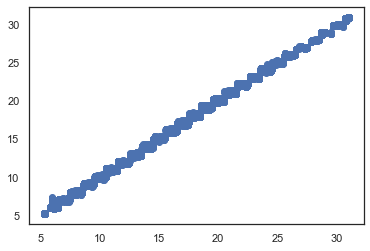

In [73]:
plt.scatter(y_test_linear,prediction_test)

## Mean Absolute Error, Mean absolute percentage error (MAPE), Accuracy Score

In [74]:
error_train = mean_absolute_error(y_train_linear,prediction_train)
error_test = mean_absolute_error(y_test_linear,prediction_test)
mape_train = 100 * np.mean(error_train / y_train_linear)
mape_test = 100 * np.mean(error_test / y_test_linear)
accuracy_train  = 100 - mape_train
accuracy_test = 100 - mape_test
r2score = r2_score(y_test_linear,prediction_test)
print('Model Performance')
print('Average Error(Train Data): {:0.4f} of int rate.'.format(np.mean(error_train)))
print('Average Error(Test Data): {:0.4f} of int rate.'.format(np.mean(error_test)))
    
print('Accuracy(Train Data) = {:0.2f}%.'.format(accuracy_train))
print('Accuracy(Test Data) = {:0.2f}%.'.format(accuracy_test))
    
print('Mape(Train Data): {:0.4f} of int rate'.format(mape_train))
print('Mape(Test Data): {:0.4f} of int rate'.format(mape_test))

print('Rsquare Score(Test Data): ',r2score)



Model Performance
Average Error(Train Data): 0.2057 of int rate.
Average Error(Test Data): 0.2059 of int rate.
Accuracy(Train Data) = 98.20%.
Accuracy(Test Data) = 98.19%.
Mape(Train Data): 1.8031 of int rate
Mape(Test Data): 1.8060 of int rate
Rsquare Score(Test Data):  0.9972069796436809


Text(0, 0.5, 'residuals')

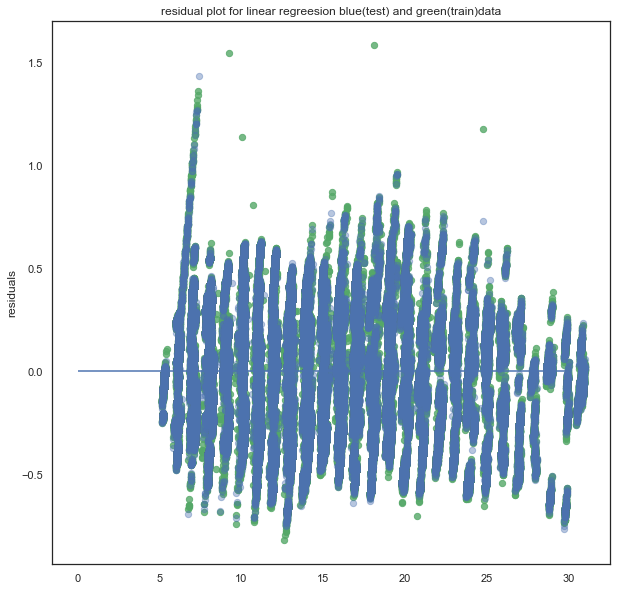

In [75]:
plt.figure(figsize = (10,10))
plt.scatter(prediction_train,(prediction_train - y_train_linear),c='g',s=40,alpha=0.8)
plt.scatter(prediction_test,(prediction_test - y_test_linear),c='b',s=40,alpha=0.4)
plt.hlines(y=0,xmin=0,xmax=30)
plt.title('residual plot for linear regression blue(test) and green(train)data')
plt.ylabel('residuals')

## Support vector machine

In [76]:
df_half=df_svm.sample(frac = 0.1)

In [77]:
X_svr = df_half.drop(['int_rate'],axis=1)
y_svr = df_half['int_rate']

In [78]:
print(X_svr.shape)
print(y_svr.shape)

(226070, 98)
(226070,)


In [79]:
from sklearn.svm import SVR
svr_model = SVR()

In [80]:
from sklearn.model_selection import train_test_split
X_train_svr,X_test_svr,y_train_svr,y_test_svr = train_test_split(X_svr,y_svr,test_size=0.3,random_state=42)
print("X_trn :", X_train_svr.shape)
print("X_tst :", X_test_svr.shape)
print("y_trn :", y_train_svr.shape)
print("y_tst :", y_test_svr.shape)

X_trn : (158249, 98)
X_tst : (67821, 98)
y_trn : (158249,)
y_tst : (67821,)


In [81]:
svr_model.fit(X_train_svr,y_train_svr)

SVR()

In [82]:
test_prediction_svr = svr_model.predict(X_test_svr)
train_prediction_svr = svr_model.predict(X_train_svr)

In [85]:
error_train = mean_absolute_error(y_train_svr,train_prediction_svr)
error_test = mean_absolute_error(y_test_svr,test_prediction_svr)
mape_train = 100 * np.mean(error_train / y_train_svr)
mape_test = 100 * np.mean(error_test / y_test_svr)
accuracy_train  = 100 - mape_train
accuracy_test = 100 - mape_test
r2score = r2_score(y_test_svr,test_prediction_svr)
print('Model Performance')
print('Average Error(Train Data): {:0.4f} of int rate.'.format(np.mean(error_train)))
print('Average Error(Test Data): {:0.4f} of int rate.'.format(np.mean(error_test)))
    
print('Accuracy(Train Data) = {:0.2f}%.'.format(accuracy_train))
print('Accuracy(Test Data) = {:0.2f}%.'.format(accuracy_test))
    
print('Mape(Train Data): {:0.4f} of int rate'.format(mape_train))
print('Mape(Test Data): {:0.4f} of int rate'.format(mape_test))

print('R2 score:' , r2score)

Model Performance
Average Error(Train Data): 0.1678 of int rate.
Average Error(Test Data): 0.1721 of int rate.
Accuracy(Train Data) = 98.53%.
Accuracy(Test Data) = 98.49%.
Mape(Train Data): 1.4699 of int rate
Mape(Test Data): 1.5118 of int rate
R2 score: 0.9971550753107348


Text(0, 0.5, 'residuals')

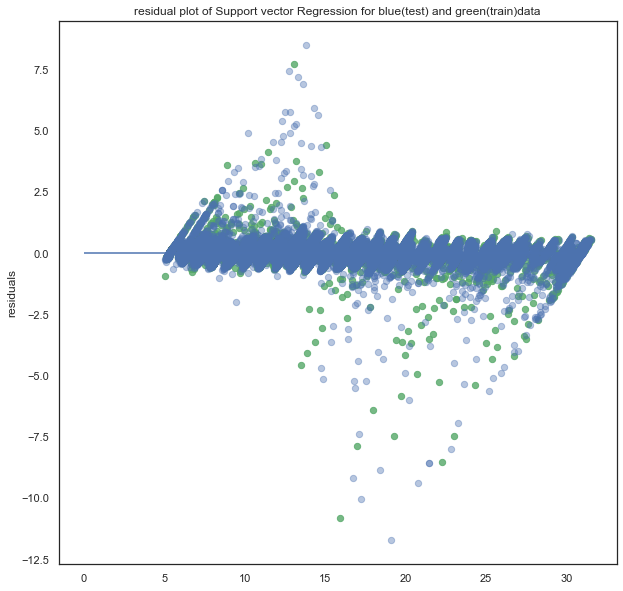

In [89]:
plt.figure(figsize = (10,10))
plt.scatter(test_prediction_svr,(test_prediction_svr - y_test_svr),c='g',s=40,alpha=0.8)
plt.scatter(train_prediction_svr,(train_prediction_svr - y_train_svr),c='b',s=40,alpha=0.4)
plt.hlines(y=0,xmin=0,xmax=30)
plt.title('residual plot of Support vector Regression for blue(test) and green(train)data')
plt.ylabel('residuals')

# Implementing Random Forest Model and Displaying Its Metrics 

In [90]:
X_random = df_random.drop(['int_rate'],axis=1).values
y_random = df_random[['int_rate']].values

In [91]:
features_list=list(df_random.columns)

In [92]:
train_features_random, test_features_random, train_labels_random, test_labels_random = train_test_split(X_random, y_random, test_size = 0.25,
                                                                           random_state = 42)

In [93]:
print('Training_feature_random:', train_features_random.shape)
print('Testing_feature_random:', test_features_random.shape)
print('Training_feature_random:', train_labels_random.shape)
print('Testing_feature_random:', test_labels_random.shape)

Training_feature_random: (1695525, 104)
Testing_feature_random: (565176, 104)
Training_feature_random: (1695525, 1)
Testing_feature_random: (565176, 1)


In [94]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators= 10, random_state=42)

In [96]:
rf_model.fit(train_features_random,train_labels_random)

RandomForestRegressor(n_estimators=10, random_state=42)

In [97]:
predictions_train = rf_model.predict(train_features_random)
predictions_test = rf_model.predict(test_features_random)

In [100]:
error_train = mean_absolute_error(train_labels_random,predictions_train)
error_test = mean_absolute_error(test_labels_random,predictions_test)
mape_train = 100 * np.mean(error_train / train_labels_random)
mape_test = 100 * np.mean(error_test / test_labels_random)
accuracy_train  = 100 - mape_train
accuracy_test = 100 - mape_test
r2score = r2_score(test_labels_random,predictions_test)
print('Model Performance')
print('Average Error(Train Data): {:0.4f} of int rate.'.format(np.mean(error_train)))
print('Average Error(Test Data): {:0.4f} of int rate.'.format(np.mean(error_test)))
    
print('Accuracy(Train Data) = {:0.2f}%.'.format(accuracy_train))
print('Accuracy(Test Data) = {:0.2f}%.'.format(accuracy_test))
    
print('Mape(Train Data): {:0.4f} of int rate'.format(mape_train))
print('Mape(Test Data): {:0.4f} of int rate'.format(mape_test))

print('R2 Score:', r2score)

Model Performance
Average Error(Train Data): 0.0118 of int rate.
Average Error(Test Data): 0.0323 of int rate.
Accuracy(Train Data) = 99.90%.
Accuracy(Test Data) = 99.72%.
Mape(Train Data): 0.1032 of int rate
Mape(Test Data): 0.2835 of int rate
R2 Score: 0.9976640025112088


Text(0, 0.5, 'residuals')

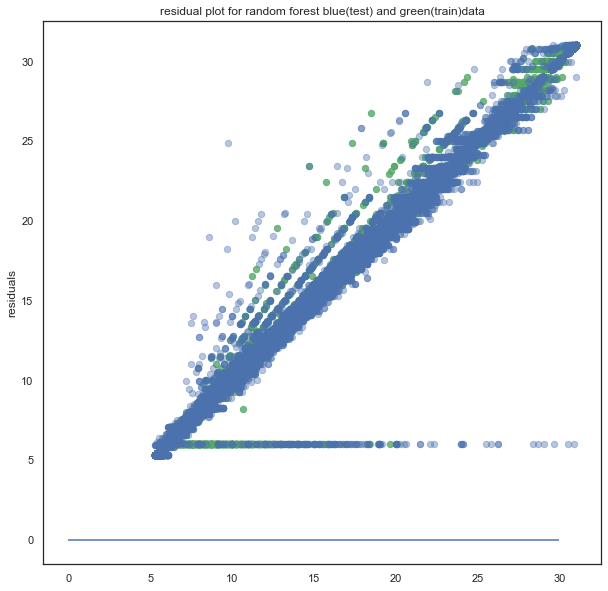

In [103]:
plt.figure(figsize = (10,10))
plt.scatter(predictions_train,train_labels_random,c='g',s=40,alpha=0.8)
plt.scatter(predictions_test,test_labels_random,c='b',s=40,alpha=0.4)
plt.hlines(y=0,xmin=0,xmax=30)
plt.title('residual plot for random forest blue(test) and green(train)data')
plt.ylabel('residuals')